# TWAS FUSION for gene JAZF1 (ENSG00000153814) with 8 Tissues

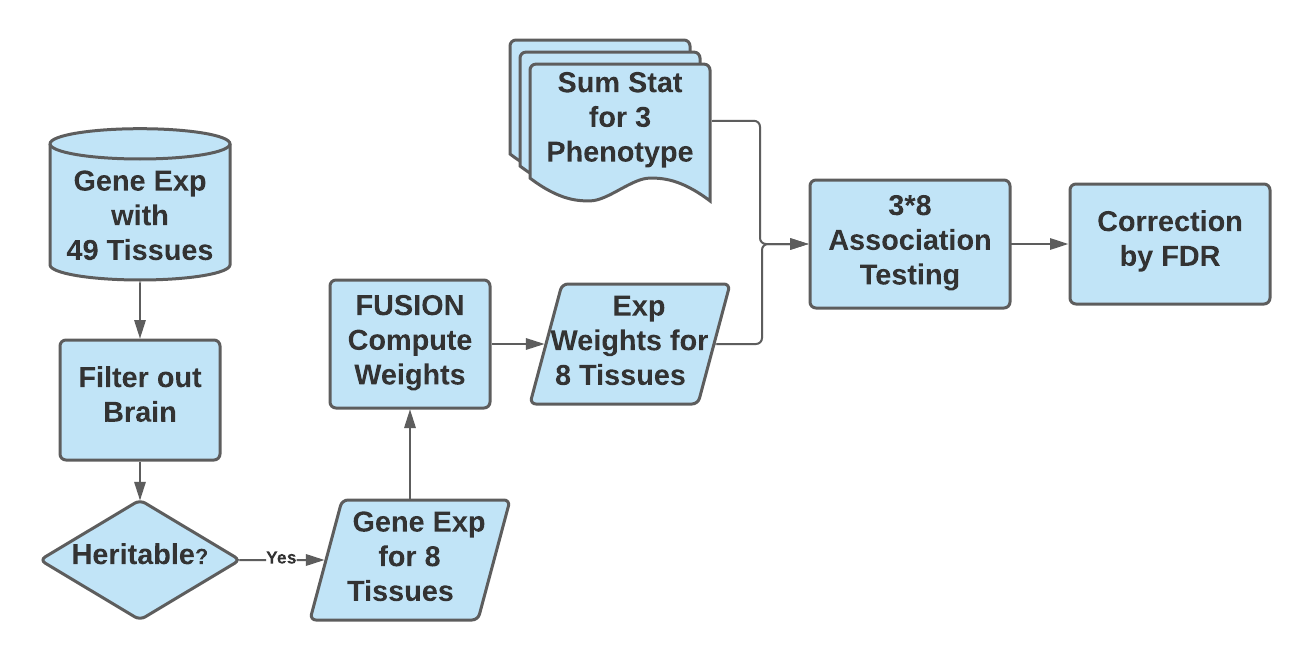

# Result

## Result Loading

In [3]:
library("dplyr")
library("tibble")
library("readr")
library("modelr")
library("purrr")
library("tidyr")
library("ggplot2")

ERROR: Error in library("dplyr"): there is no package called ‘dplyr’


In [ ]:
phenotype = c("Asthma","diabetes","WAIST")
tissue = read_delim("~/Project/one_gene/passed_tissue",delim = "\t",col_names = F)$X1
working = tibble(tissue = rep(tissue,3))%>%mutate(phenotype = c(rep(phenotype[1],8),rep(phenotype[2],8),rep(phenotype[3],8)),
                                                 path = map2(phenotype,tissue,~paste(c("~/Project/one_gene/",.x,".sumstat/",.y,"/result/",.x,"_chr7.twas.txt"),collapse = "")),
                                                 data = map(path,~read_delim(.x,delim = "\t"))
                                                 )

## Filtering of Significant result.

In the following tables shown the tissue/phenotype combination where JAZF1 has a significant association with the given phenotype, adjusted for multiple testing via FDR. The columns in each of the tables stands for:  
>tissue: The tissues where gene expression was measured

>phenotype: The phenotype for the provided GWAS sum stat 

>HSQ: The heritability of the gene expression

>BEST.GWAS.Z: The Z score for the cis SNP with the most significant association with the given phenotype

>NSNP: Number of SNPs that went into analysis

>NWGT: Number of non-zero expression weight estimated by the best performing models

>MODEL: The model from which the expression weights gave the best cross validation prediction accuracy for gene expression.

>MODELCV.R2: The average R2 for the predicted expression and the actual expression among iterations of cross validation.

>MODELCV.PV: The average p.values for the linear regression between predicted expression and the actual expression among iterations of cross validation.

>TWAS.Z: The TWAS.Z score calculated as a linear combination of the expression weights and the GWAS score

>TWAS.P: The pvalue calculated from TWAS.Z

>TWAS.P.Adj: TWAS.P adjusted for multiple testing

### Tissue-Phenotype Combinations with significant TWAS Result

In [5]:
working%>%select(-path)%>%unnest(data)%>%select(-c(FILE:P1,EQTL.ID:EQTL.GWAS.Z),-BEST.GWAS.ID,-PANEL)%>%mutate(TWAS.P.Adj = p.adjust(TWAS.P))%>%filter(TWAS.P.Adj < 0.05)

tissue,phenotype,HSQ,BEST.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Liver,Asthma,0.603,7.4,25248,22,lasso,0.180,0.033,-7.08,1.46e-12,2.920e-11
Muscle_Skeletal,Asthma,0.174,7.4,25248,10,lasso,0.070,0.024,-4.29,1.81e-05,3.077e-04
Artery_Tibial,diabetes,0.107,-8.9,25248,4,lasso,0.013,0.370,-3.85,1.20e-04,1.800e-03
Liver,diabetes,0.603,-8.9,25248,22,lasso,0.180,0.033,-4.79,1.69e-06,3.042e-05
Muscle_Skeletal,diabetes,0.174,-8.9,25248,10,lasso,0.070,0.024,-7.06,1.63e-12,3.097e-11
Artery_Tibial,WAIST,0.107,-12.8,25248,4,lasso,0.013,0.370,-4.13,3.68e-05,5.888e-04
Muscle_Skeletal,WAIST,0.174,-12.8,25248,10,lasso,0.070,0.024,-8.20,2.38e-16,4.998e-15


### Tissues with significant weights estimation

In [7]:
result = working%>%select(-path)%>%unnest(data)%>%select(-c(FILE:P1,EQTL.ID:EQTL.GWAS.Z),-BEST.GWAS.ID,-PANEL)%>%mutate(TWAS.P.Adj = p.adjust(TWAS.P))
result%>%filter(MODELCV.PV < 0.05)

tissue,phenotype,HSQ,BEST.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Liver,Asthma,0.603,7.4,25248,22,lasso,0.180,0.033,-7.080,1.46e-12,2.920e-11
Muscle_Skeletal,Asthma,0.174,7.4,25248,10,lasso,0.070,0.024,-4.290,1.81e-05,3.077e-04
Whole_Blood,Asthma,0.193,7.4,25248,1,top1,0.082,0.011,-1.230,2.20e-01,1.000e+00
Liver,diabetes,0.603,-8.9,25248,22,lasso,0.180,0.033,-4.790,1.69e-06,3.042e-05
Muscle_Skeletal,diabetes,0.174,-8.9,25248,10,lasso,0.070,0.024,-7.060,1.63e-12,3.097e-11
Whole_Blood,diabetes,0.193,-8.9,25248,1,top1,0.082,0.011,0.615,5.38e-01,1.000e+00
Liver,WAIST,0.603,-12.8,25248,22,lasso,0.180,0.033,-1.100,2.72e-01,1.000e+00
Muscle_Skeletal,WAIST,0.174,-12.8,25248,10,lasso,0.070,0.024,-8.200,2.38e-16,4.998e-15
Whole_Blood,WAIST,0.193,-12.8,25248,1,top1,0.082,0.011,-0.946,3.44e-01,1.000e+00


### Tissue-Phenotype Combinations with significant TWAS Result and a significant estimated weights

In [8]:
working%>%select(-path)%>%unnest(data)%>%select(-c(FILE:P1,EQTL.ID:EQTL.GWAS.Z),-BEST.GWAS.ID,-PANEL)%>%mutate(TWAS.P.Adj = p.adjust(TWAS.P))%>%filter(MODELCV.PV < 0.05,TWAS.P.Adj < 0.05)

tissue,phenotype,HSQ,BEST.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Liver,Asthma,0.603,7.4,25248,22,lasso,0.18,0.033,-7.08,1.46e-12,2.920e-11
Muscle_Skeletal,Asthma,0.174,7.4,25248,10,lasso,0.07,0.024,-4.29,1.81e-05,3.077e-04
Liver,diabetes,0.603,-8.9,25248,22,lasso,0.18,0.033,-4.79,1.69e-06,3.042e-05
Muscle_Skeletal,diabetes,0.174,-8.9,25248,10,lasso,0.07,0.024,-7.06,1.63e-12,3.097e-11
Muscle_Skeletal,WAIST,0.174,-12.8,25248,10,lasso,0.07,0.024,-8.20,2.38e-16,4.998e-15


## Full result tables

Spleen has a NA result because the inability for lasso to get a expression weights with the full samples

In [9]:
working%>%select(-path)%>%unnest(data)%>%select(-c(FILE:P1,EQTL.ID:EQTL.GWAS.Z),-BEST.GWAS.ID,-PANEL)%>%mutate(TWAS.P.Adj = p.adjust(TWAS.P))

tissue,phenotype,HSQ,BEST.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Artery_Tibial,Asthma,0.107,7.4,25248,4,lasso,0.0130,0.370,-0.7210,4.71e-01,1.000e+00
Liver,Asthma,0.603,7.4,25248,22,lasso,0.1800,0.033,-7.0800,1.46e-12,2.920e-11
Lung,Asthma,0.169,7.4,25248,6,lasso,0.0210,0.280,-1.0100,3.10e-01,1.000e+00
Muscle_Skeletal,Asthma,0.174,7.4,25248,10,lasso,0.0700,0.024,-4.2900,1.81e-05,3.077e-04
Spleen,Asthma,0.491,NA,0,0,lasso,0.0960,0.240,NA,NA,NA
Stomach,Asthma,0.250,7.4,25248,1,top1,0.0035,0.430,-0.1870,8.52e-01,1.000e+00
Thyroid,Asthma,0.189,7.4,25248,2,lasso,0.0110,0.330,-0.5070,6.12e-01,1.000e+00
Whole_Blood,Asthma,0.193,7.4,25248,1,top1,0.0820,0.011,-1.2300,2.20e-01,1.000e+00
Artery_Tibial,diabetes,0.107,-8.9,25248,4,lasso,0.0130,0.370,-3.8500,1.20e-04,1.800e-03


## JAZF1_JTI Analysis
### Real Similiarity Matrixs

In [73]:
tissue = c("Liver","Lung","Whole_Blood","Muscle_Skeletal","Spleen","Artery_Tibial","Thyroid","Stomach")

In [74]:
result_real = read.table("/mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/Asthma_chr7.twas.txt",sep = "\t",header = T)

In [75]:
result_real$tissue = tissue

FILE,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,tissue
<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Liver.wgt.RDat,NA,NA,-6.9224,4.44e-12,Liver
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Lung.wgt.RDat,NA,NA,0.0719,9.43e-01,Lung
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Whole_Blood.wgt.RDat,NA,NA,2.7856,5.34e-03,Whole_Blood
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Muscle_Skeletal.wgt.RDat,NA,NA,-2.8395,4.52e-03,Muscle_Skeletal
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Spleen.wgt.RDat,NA,NA,0.5169,6.05e-01,Spleen
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Artery_Tibial.wgt.RDat,NA,NA,0.1213,9.03e-01,Artery_Tibial
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Thyroid.wgt.RDat,NA,NA,-0.3653,7.15e-01,Thyroid
///mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/result/JAZF1_JTI_8.ENSG00000153814_Stomach.wgt.RDat,NA,NA,NA,NA,Stomach


In [ ]:
rsq = list()
pval = list()
for(i in result_real$FILE ){
    WGT = attach(i)
    rsq_i = WGT$cv.performance[[1,1]]
    pval_i = WGT$cv.performance[[2,1]]
    rsq[i] = rsq_i
    pval[i] = pval_i
}
rsq
pval

In [79]:
result_real$MODELCV.PV = as.numeric(pval)
result_real$MODELCV.R2 = as.numeric(rsq)
result_real$TWAS.P = as.numeric(result_real$TWAS.P)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [86]:
result_real_condense = result_real[c(17:21)]

In [89]:
na.omit(result_real_condense[result_real_condense$TWAS.P < 0.05/8,])

,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,tissue
,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,0.19154324,3.833424e-11,-6.9224,4.44e-12,Liver
3,0.07714445,2.471528e-13,2.7856,5.34e-03,Whole_Blood
4,0.07350023,2.327932e-13,-2.8395,4.52e-03,Muscle_Skeletal


#### Full table for JTI analysis with real similarity

In [90]:
result_real_condense

MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,tissue
<dbl>,<dbl>,<chr>,<dbl>,<chr>
0.19154324,3.833424e-11,-6.9224,4.44e-12,Liver
0.01392573,7.342914e-03,0.0719,9.43e-01,Lung
0.07714445,2.471528e-13,2.7856,5.34e-03,Whole_Blood
0.07350023,2.327932e-13,-2.8395,4.52e-03,Muscle_Skeletal
0.04010350,2.434957e-03,0.5169,6.05e-01,Spleen
0.01228844,7.331074e-03,0.1213,9.03e-01,Artery_Tibial
0.01766334,1.416007e-03,-0.3653,7.15e-01,Thyroid
0.01001301,7.206194e-02,NA,NA,Stomach


### Sim Similiarity Matrix

In [46]:
result_sim = read.table("/mnt/mfs/statgen/neuro-twas/JAZF1_JTI8/Asthma_chr7.twas.txt",sep = "\t")

In [47]:
result_sim = data.frame()
for(i in 5:9){
    dir = paste0(c("/mnt/mfs/statgen/neuro-twas/JAZF1_JTI_sim",i,"/Asthma_chr7.twas.txt"),collapse = "")
    result_sim_i = read.table(dir,sep = "\t",header = T)
    result_sim = rbind(result_sim , result_sim_i)
}

In [49]:
result_sim$sim = c(rep(0.5,8),rep(0.6,8),rep(0.7,8),rep(0.8,8),rep(0.9,8))
result_sim$tissue = rep(tissue,5)
result_sim$TWAS.P = as.numeric(result_sim$TWAS.P)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [50]:
result_sim_condense = result_sim[c(17:22)]

In [88]:
result_sim_condense[result_sim_condense$TWAS.P < 0.05/8,]

,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,sim,tissue
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,0.190,3.8e-11,-6.9224,4.44e-12,0.5,Liver
3,0.077,2.5e-13,2.7856,5.34e-03,0.5,Whole_Blood
4,0.074,2.3e-13,-2.8395,4.52e-03,0.5,Muscle_Skeletal
NA,NA,NA,NA,NA,NA,NA
9,0.190,3.8e-11,-6.9224,4.44e-12,0.6,Liver
11,0.077,2.5e-13,2.7856,5.34e-03,0.6,Whole_Blood
12,0.074,2.3e-13,-2.8395,4.52e-03,0.6,Muscle_Skeletal
NA.1,NA,NA,NA,NA,NA,NA
17,0.190,3.8e-11,-6.9224,4.44e-12,0.7,Liver


#### Full table for sim analysis

In [92]:
result_sim_condense

MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,sim,tissue
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
0.1900,3.8e-11,-6.9224,4.44e-12,0.5,Liver
0.0140,7.3e-03,0.0719,9.43e-01,0.5,Lung
0.0770,2.5e-13,2.7856,5.34e-03,0.5,Whole_Blood
0.0740,2.3e-13,-2.8395,4.52e-03,0.5,Muscle_Skeletal
0.0400,2.4e-03,0.5169,6.05e-01,0.5,Spleen
0.0120,7.3e-03,0.1213,9.03e-01,0.5,Artery_Tibial
0.0180,1.4e-03,-0.3653,7.15e-01,0.5,Thyroid
0.0100,7.2e-02,NA,NA,0.5,Stomach
0.1900,3.8e-11,-6.9224,4.44e-12,0.6,Liver


## Discussion
As indicated by fusion and the JTI* analysis, the tissue of muscle skeletal and Liver are TWAS significant for Asthma. This result is anticipated because the JTI algorithm, based on CV performance of grid search combination of hyperparameter,  ultimatily decided to not leverage tissues with similarity less than 1. In our case, make it effectively a single tissue analysis with elastic net.   
 
One difference between the FUSION and JTI result is that of the Whole blood, this is because FUSION use top1 instead of enet, and provide different estimated weight and ultimatily impacting the TWAS result. 

# Method

## Extraction of data 
Done locally to extract the data for each tissues and transformed them into plink trio 

In [ ]:

dat = readRDS("~/Downloads/ENSG00000153814.11.GTEx_V8.rds")

dat$X%>%colnames()

bim = dat$X%>%colnames()

bim = read.table( text = bim, sep = "_")
bim$V1 = 7
bim = bim%>%mutate(name = dat$X%>%colnames(), zero = 0  )%>%select(V1,name,zero,V2,V3,V4)
colnames(bim) = c("chr","id","posg","pos","ref","alt")
install.packages("genio")
library("genio")

output_path_pre = paste("/Users/haosun/one_gene/")
output_path_named = paste("/cache/ENSG00000153814.11.GTEx_V8")

working = tibble(tissue = y)
working = working%>%filter(!str_detect(tissue,"Brain"))
working = working%>%mutate(
  fam = map(tissue, ~dat$y[[which(names(dat$y) == .x )]]%>%as_tibble(rownames = "fam_ID")%>%mutate(sample_ID = fam_ID,V2 = 0, V3 = 0, V4 = 0)%>%select("fam" = fam_ID, "id" = sample_ID, "pat" = V2, "mat" = V3, "sex" = V4,"pheno" = V1)),
  fam_sample = map(fam,~.x$fam),
  bed_prime = map(fam_sample, ~dat$X%>%as_tibble(rownames = NA)%>%filter(rownames(dat$X%>%as_tibble(rownames = NA)) %in% .x ))
  
  )


working = working%>%mutate(bed = map(bed_prime,~.x%>%as.matrix(rownames.force = TRUE)%>%t()))
working = working%>%mutate(output_path = map_chr(tissue, ~paste(c(output_path_pre,.x,output_path_named),collapse = "") ))

working%>%mutate(output = pmap(list(bed,fam,output_path),function(first,second,third) write_plink(third, first, bim = bim, fam = second) ) )
working$tissue%>%as_tibble()%>%write_delim("~/tissue.out",delim = "\t")

## Make needed file
Done on the cluster.

In [ ]:
cd ~/Project/one_gene
for i in `ls` ; do 
touch one_gene/$i/cache/GTEx_V8.ENSG00000153814.exp 
touch one_gene/$i/cache/GTEx_V8.ENSG00000153814.pheno ; done
head /home/hs3163/Project/Alz/data/RSM_Alz_region_list_DLPFC.txt > rg_ls
cat /home/hs3163/Project/Alz/data/RSM_Alz_region_list_DLPFC.txt | grep ENSG00000153814 >> rg_ls
tail -36 tissue.out > tissue.out
cd ~/Project/one_gene
for i in `cat ~/Project/one_gene/passed_tissue` ; do echo ~/Project/one_gene/$i/ ; done

## Estimation of expression weights for each tissues. 
The following codes estimated the expression weights for each of the following tissues: 
   > Artery_Tibial,
     Liver ,
     Lung ,
    Muscle_Skeletal, 
    Spleen ,
    Stomach ,
    Thyroid ,
    Whole_Blood 

In [ ]:
 

for tissue in `cat ~/Project/one_gene/passed_tissue`; do
cd $tissue
nohup sos run ~/GIT/neuro-twas/workflow/twas_fusion.ipynb compute_wgt  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/one_gene/GTEx_V8.txt  \
  --wd /home/hs3163/Project/one_gene/$tissue/ \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/one_gene/GTEx_V8.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1 \
  --asso_mem "60G" -s build \
  -J 6 -q csg -c /home/hs3163/GIT/neuro-twas/code/csg.yml &
cd ..
done

  



## Association testing for each tissues-phenotype combinations
The following codes takes the estimated weights for each of the aforementioned tissues. And conduct association testing against the three phenotype: 
   >"Asthma","Waiste","Diabete"

In [ ]:
for sumstat in `cat ~/Project/one_gene/data/sumstat_list`;do
    mkdir $sumstat
    cd $sumstat
    for tissue in `cat ~/Project/one_gene/passed_tissue`; do
    mkdir $tissue
    cd $tissue
    nohup sos run ~/GIT/neuro-twas/workflow/twas_fusion.ipynb association_test  \
    --gwas_sumstat /home/hs3163/Project/one_gene/data/$sumstat \
    --molecular-pheno  /home/hs3163/Project/one_gene/GTEx_V8.txt  \
    --wd /home/hs3163/Project/one_gene/$sumstat/$tissue/ \
    --weights_path /home/hs3163/Project/one_gene/$tissue/WEIGHTS \
    --genotype_list /home/hs3163/Project/one_gene/data/geno_list \
    --region_list /home/hs3163/Project/one_gene/GTEx_V8.txt \
    --region_name 1 \
    --data_start 2 \
    --window 500000 \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --model bslmm blup lasso top1 enet \
    --job_size 1  -s build\
    --max_impute 1 \
    --asso_mem "60G" \
    -J 6 -q csg -c /home/hs3163/GIT/neuro-twas/code/csg.yml &
    cd .. ;
    done
    cd ..;
    done

In [1]:
library(glmnet)

ERROR: Error in library(glmnet): there is no package called ‘glmnet’
